In [1]:
from google.colab import files
uploaded = files.upload()

Saving Logistic_X_Test.csv to Logistic_X_Test.csv
Saving Logistic_X_Train.csv to Logistic_X_Train.csv
Saving Logistic_Y_Train.csv to Logistic_Y_Train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
X = pd.read_csv("Logistic_X_Train.csv")
Y = pd.read_csv("Logistic_Y_Train.csv")
X_test = pd.read_csv("Logistic_X_Test.csv")

In [4]:
X.shape

(2250, 2)

In [5]:
Y.shape

(2250, 1)

In [7]:
Y = np.array(Y)
X = np.array(X)
X_test = np.array(X_test)

In [8]:
Y = Y.reshape((Y.shape[0],))
Y.shape

(2250,)

In [9]:
split=int(X.shape[0]*.8)
print(split)

1800


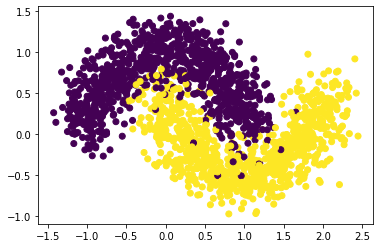

In [10]:
plt.scatter(X[:split,0],X[:split,1],c=Y[:split])
plt.show()

In [11]:
from keras import models
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model=models.Sequential()
model.add(Dense(8,activation='relu',input_shape=(2,)))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(X,Y,batch_size=52,epochs=1000,validation_split=0.2)

Train on 1800 samples, validate on 450 samples
Epoch 1/1000
1800/1800 [==============================] - 0s 223us/step - loss: 0.7418 - accuracy: 0.3006 - val_loss: 0.7277 - val_accuracy: 0.3000
Epoch 2/1000
1800/1800 [==============================] - 0s 37us/step - loss: 0.7077 - accuracy: 0.4289 - val_loss: 0.6968 - val_accuracy: 0.4889
Epoch 3/1000
1800/1800 [==============================] - 0s 26us/step - loss: 0.6774 - accuracy: 0.5772 - val_loss: 0.6671 - val_accuracy: 0.5622
Epoch 4/1000
1800/1800 [==============================] - 0s 26us/step - loss: 0.6455 - accuracy: 0.6394 - val_loss: 0.6345 - val_accuracy: 0.6578
Epoch 5/1000
1800/1800 [==============================] - 0s 26us/step - loss: 0.6098 - accuracy: 0.7172 - val_loss: 0.5976 - val_accuracy: 0.7244
Epoch 6/1000
1800/1800 [==============================] - 0s 27us/step - loss: 0.5718 - accuracy: 0.7933 - val_loss: 0.5609 - val_accuracy: 0.8022
Epoch 7/1000
1800/1800 [==============================] - 0s 33us/step

In [16]:
output = model.predict(X_test)

In [18]:
labels = []
for i in range(output.shape[0]):
  if output[i] >= 0.5:
    labels.append(1)
  else:
    labels.append(0)

In [20]:
labels = np.array(labels)
df = pd.DataFrame(data=labels,columns=['label'])
df.to_csv("classify.csv",index=False)

In [21]:
from google.colab import files
files.download('classify.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>